# Build DF from catch locations and VMS and env data

In [1]:
import datetime 
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from utilities import plot_date_distribution, get_region_border

/home/anna/msc_oppgave/fish-forecast/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# PATH = '/home/anna/msc_oppgave/fish-forecast/ERS_VMS_download_area_2011_2024_jun_nov.csv'

# df = pd.read_csv(PATH, sep=';')

# def find_days_interval(start:str = '06-01-2011', end:str = '11-30-2024'):
#     '''Finds the date range between two dates for every year'''
#     all_dates_set = set()
#     start_year = start[-4:]
#     end_year = end[-4:]
#     for year in range(int(start_year), int(end_year) +1):
#         start_date = datetime.date(year, int(start[:2]), int(start[3:5]))
#         end_date = datetime.date(year, int(end[:2]), int(end[3:5]))
#         dates_in_year = pd.date_range(start=start_date, end=end_date)
#         all_dates_set.update(dates_in_year)
#     return all_dates_set

In [3]:
# df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# catch_dates = df['Date'].unique()

# catch_dates_set = set(catch_dates)

# # find all dates from 06-01 to 11-30 in years 2011 to 2024
# all_dates_set = find_days_interval('06-01-2011', '11-30-2024')

# full_no_catch_dates_set = all_dates_set - catch_dates_set
# print(f"Number of dates: {len(all_dates_set)}, catch/no catch: {len(catch_dates_set)}/{len(full_no_catch_dates_set)}, ratio: {len(catch_dates_set)/len(all_dates_set):.2f}")
# # plot_date_distribution(catch_dates_set, full_no_catch_dates_set, '06-01', '11-30')

# # Focus region: test
# FA_dates_set = find_days_interval('07-01-2019', '11-30-2024')

# region = get_region_border('/home/anna/msc_oppgave/fish-forecast/areas.json', 'test')
# # Only include catches within the set and the region
# df_FA = df[(df['Date'].isin(FA_dates_set))]
# df_FA = df_FA[~((df_FA["CatchLat"] < region["SW"]["lat"]) | (df_FA["CatchLat"] > region["NE"]["lat"]))]
# df_FA = df_FA[~((df_FA["CatchLon"] < region["SW"]["lon"]) | (df_FA["CatchLon"] > region["NE"]["lon"]))]

# FA_catch_dates = df_FA['Date'].unique()
# FA_catch_dates_set = set(FA_catch_dates)

# FA_full_no_catch_dates_set = FA_dates_set - FA_catch_dates_set
# print(f"Number of dates: {len(FA_dates_set)}, catch/no catch: {len(FA_catch_dates_set)}/{len(FA_full_no_catch_dates_set)}, ratio: {len(FA_catch_dates_set)/len(FA_dates_set):.2f}")


In [4]:
# dfcorr = pd.read_csv('/home/anna/msc_oppgave/fish-forecast/correlation_dataset_method1.csv', sep=';', low_memory=False)
# print(f'FA shape{df_FA.shape}')
# print(f'Correlation shape{dfcorr.shape}')

In [5]:
# # Check the actual distribution in your correlation dataset
# catch_counts = dfcorr['HasCatch'].value_counts()
# print(f"Catch records (HasCatch=1): {catch_counts.get(1, 0)}")
# print(f"No-catch records (HasCatch=0): {catch_counts.get(0, 0)}")
# print(f"Total records: {len(dfcorr)}")
# print(f"Expected total: {len(df_FA) * 2}")

In [ ]:
import datetime 
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from utilities import plot_date_distribution, get_region_border

METHOD1_PATH = '/home/anna/msc_oppgave/fish-forecast/correlation_dataset_method1_full.csv'
corrrolation_dataset = pd.read_csv(METHOD1_PATH, sep=';', low_memory=False)
print(f"Loaded correlation dataset: {corrrolation_dataset.shape}")
print(f"Columns: {list(corrrolation_dataset.columns)}")

Loaded correlation dataset: (51986, 205)
Columns: ['Date', 'Latitude', 'Longitude', 'HasCatch', 'CatchWeight', 'bio_chl_depth_2.0', 'bio_chl_depth_3.0', 'bio_chl_depth_4.0', 'bio_chl_depth_5.0', 'bio_chl_depth_6.0', 'bio_chl_depth_8.0', 'bio_chl_depth_10.0', 'bio_chl_depth_11.0', 'bio_chl_depth_13.0', 'bio_chl_depth_16.0', 'bio_chl_depth_18.0', 'bio_chl_depth_22.0', 'bio_chl_depth_25.0', 'bio_chl_depth_29.0', 'bio_kd_depth_2.0', 'bio_kd_depth_3.0', 'bio_kd_depth_4.0', 'bio_kd_depth_5.0', 'bio_kd_depth_6.0', 'bio_kd_depth_8.0', 'bio_kd_depth_10.0', 'bio_kd_depth_11.0', 'bio_kd_depth_13.0', 'bio_kd_depth_16.0', 'bio_kd_depth_18.0', 'bio_kd_depth_22.0', 'bio_kd_depth_25.0', 'bio_kd_depth_29.0', 'bio_model_depth_depth_2.0', 'bio_model_depth_depth_3.0', 'bio_model_depth_depth_4.0', 'bio_model_depth_depth_5.0', 'bio_model_depth_depth_6.0', 'bio_model_depth_depth_8.0', 'bio_model_depth_depth_10.0', 'bio_model_depth_depth_11.0', 'bio_model_depth_depth_13.0', 'bio_model_depth_depth_16.0', 'bio_

In [19]:
for col in corrrolation_dataset.columns:
    print(col)

Date
Latitude
Longitude
HasCatch
CatchWeight
bio_chl_depth_2.0
bio_chl_depth_3.0
bio_chl_depth_4.0
bio_chl_depth_5.0
bio_chl_depth_6.0
bio_chl_depth_8.0
bio_chl_depth_10.0
bio_chl_depth_11.0
bio_chl_depth_13.0
bio_chl_depth_16.0
bio_chl_depth_18.0
bio_chl_depth_22.0
bio_chl_depth_25.0
bio_chl_depth_29.0
bio_kd_depth_2.0
bio_kd_depth_3.0
bio_kd_depth_4.0
bio_kd_depth_5.0
bio_kd_depth_6.0
bio_kd_depth_8.0
bio_kd_depth_10.0
bio_kd_depth_11.0
bio_kd_depth_13.0
bio_kd_depth_16.0
bio_kd_depth_18.0
bio_kd_depth_22.0
bio_kd_depth_25.0
bio_kd_depth_29.0
bio_model_depth_depth_2.0
bio_model_depth_depth_3.0
bio_model_depth_depth_4.0
bio_model_depth_depth_5.0
bio_model_depth_depth_6.0
bio_model_depth_depth_8.0
bio_model_depth_depth_10.0
bio_model_depth_depth_11.0
bio_model_depth_depth_13.0
bio_model_depth_depth_16.0
bio_model_depth_depth_18.0
bio_model_depth_depth_22.0
bio_model_depth_depth_25.0
bio_model_depth_depth_29.0
bio_no3_depth_2.0
bio_no3_depth_3.0
bio_no3_depth_4.0
bio_no3_depth_5.0
bio_n

### Method 1
do for every day\
    find number of catches (N), randomly pick N points within the region making sure that they are (d) distance away from any catch and not on land (i.e. they are valid in copcus ds)\
    for every catch location, extract all variables from phy and bio dataset 

# Correlation Analysis for Mackerel Catch Prediction

Let's analyze the environmental factors that are most predictive of mackerel catches. We'll examine correlations, feature importance, and statistical relationships.

In [7]:
# First, let's examine the structure and basic statistics of our dataset
print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {corrrolation_dataset.shape}")
print(f"Columns: {len(corrrolation_dataset.columns)}")
print(f"\nFirst few columns: {list(corrrolation_dataset.columns[:10])}")

# Check the distribution of catch vs no-catch
catch_distribution = corrrolation_dataset['HasCatch'].value_counts()
print(f"\n=== CATCH DISTRIBUTION ===")
print(f"Catch records (HasCatch=1): {catch_distribution.get(1, 0)}")
print(f"No-catch records (HasCatch=0): {catch_distribution.get(0, 0)}")
print(f"Balance ratio: {catch_distribution.get(1, 0) / len(corrrolation_dataset):.2%}")

# Identify environmental variable columns
env_columns = [col for col in corrrolation_dataset.columns if col.startswith(('bio_', 'phy_'))]
print(f"\n=== ENVIRONMENTAL VARIABLES ===")
print(f"Total environmental variables: {len(env_columns)}")

# Separate bio and phy variables
bio_vars = [col for col in env_columns if col.startswith('bio_')]
phy_vars = [col for col in env_columns if col.startswith('phy_')]
print(f"Biological variables: {len(bio_vars)}")
print(f"Physical variables: {len(phy_vars)}")

# Check for missing values
missing_values = corrrolation_dataset[env_columns].isnull().sum()
print(f"\n=== DATA COMPLETENESS ===")
print(f"Variables with missing values: {(missing_values > 0).sum()}")
print(f"Average completeness: {(1 - missing_values.mean() / len(corrrolation_dataset)):.2%}")

# Display basic statistics
print(f"\n=== BASIC STATISTICS ===")
print(corrrolation_dataset[['Date', 'Latitude', 'Longitude', 'HasCatch', 'CatchWeight']].describe())

=== DATASET OVERVIEW ===
Dataset shape: (51986, 205)
Columns: 205

First few columns: ['Date', 'Latitude', 'Longitude', 'HasCatch', 'CatchWeight', 'bio_chl_depth_2.0', 'bio_chl_depth_3.0', 'bio_chl_depth_4.0', 'bio_chl_depth_5.0', 'bio_chl_depth_6.0']

=== CATCH DISTRIBUTION ===
Catch records (HasCatch=1): 25993
No-catch records (HasCatch=0): 25993
Balance ratio: 50.00%

=== ENVIRONMENTAL VARIABLES ===
Total environmental variables: 200
Biological variables: 140
Physical variables: 60

=== DATA COMPLETENESS ===
Variables with missing values: 200
Average completeness: 92.06%

=== BASIC STATISTICS ===
           Latitude     Longitude      HasCatch   CatchWeight
count  51986.000000  51986.000000  51986.000000  5.198600e+04
mean      62.576314      1.783420      0.500000  4.377578e+04
std        2.735432      2.431780      0.500005  9.505928e+04
min       57.665000     -3.233000      0.000000  0.000000e+00
25%       60.000000     -0.103079      0.000000  0.000000e+00
50%       62.948465  

In [21]:
# Calculate correlations between environmental variables and HasCatch
print("=== CORRELATION ANALYSIS ===")

# Get correlations with HasCatch (target variable)
correlations = corrrolation_dataset[env_columns + ['HasCatch']].corr()['HasCatch'].drop('HasCatch')

# Sort by absolute correlation value
correlations_abs = correlations.abs().sort_values(ascending=False)

print("Top 20 Most Correlated Environmental Variables with Mackerel Catch:")
print("=" * 70)
for i, (var, corr) in enumerate(correlations_abs.head(20).items(), 1):
    original_corr = correlations[var]
    direction = "↑" if original_corr > 0 else "↓"
    print(f"{i:2d}. {var:50s} {direction} {original_corr:7.4f} (|{corr:.4f}|)")

# Separate by variable type
bio_correlations = correlations_abs[correlations_abs.index.str.startswith('bio_')]
phy_correlations = correlations_abs[correlations_abs.index.str.startswith('phy_')]

print(f"\n=== TOP BIOLOGICAL VARIABLES ===")
for i, (var, corr) in enumerate(bio_correlations.head(10).items(), 1):
    original_corr = correlations[var]
    direction = "↑" if original_corr > 0 else "↓"
    print(f"{i:2d}. {var:50s} {direction} {original_corr:7.4f}")

print(f"\n=== TOP PHYSICAL VARIABLES ===")
for i, (var, corr) in enumerate(phy_correlations.head(10).items(), 1):
    original_corr = correlations[var]
    direction = "↑" if original_corr > 0 else "↓"
    print(f"{i:2d}. {var:50s} {direction} {original_corr:7.4f}")

# Save the correlation results to a CSV file
output_path = Path(METHOD1_PATH).parent / 'correlation_results.csv'
correlation_df = pd.DataFrame({
    'Variable': correlations.index,
    'Correlation': correlations.values
})
correlation_df.to_csv(output_path, index=False)
print(f"\nCorrelation results saved to {output_path}")

=== CORRELATION ANALYSIS ===
Top 20 Most Correlated Environmental Variables with Mackerel Catch:
 1. phy_thetao_depth_29.444730758666992                ↑  0.2361 (|0.2361|)
 2. phy_thetao_depth_25.211410522460938                ↑  0.2118 (|0.2118|)
 3. phy_thetao_depth_21.598819732666016                ↑  0.1947 (|0.1947|)
 4. phy_thetao_depth_18.495559692382812                ↑  0.1838 (|0.1838|)
 5. phy_thetao_depth_15.810070037841797                ↑  0.1760 (|0.1760|)
 6. phy_thetao_depth_13.467140197753906                ↑  0.1702 (|0.1702|)
 7. phy_thetao_depth_11.404999732971191                ↑  0.1659 (|0.1659|)
 8. phy_thetao_depth_9.572997093200684                 ↑  0.1628 (|0.1628|)
 9. phy_thetao_depth_7.92956018447876                  ↑  0.1607 (|0.1607|)
10. phy_thetao_depth_6.440614223480225                 ↑  0.1595 (|0.1595|)
11. phy_thetao_depth_5.078224182128906                 ↑  0.1586 (|0.1586|)
12. phy_thetao_depth_3.8194949626922607                ↑  0.1581 (|

In [9]:
# Find minimum depth for each type
bio_depths = sorted({float(col.split('_')[-1]) for col in env_columns if col.startswith('bio_') and 'depth_' in col})
phy_depths = sorted({float(col.split('_')[-1]) for col in env_columns if col.startswith('phy_') and 'depth_' in col})

bio_first_depth = bio_depths[0]
phy_first_depth = phy_depths[0]

def is_depth(col, depth, prefix):
    if not col.startswith(prefix) or 'depth_' not in col:
        return False
    try:
        depth_val = float(col.split('_')[-1])
        return abs(depth_val - depth) < 1e-3
    except Exception:
        return False

bio_first_vars = [col for col in env_columns if is_depth(col, bio_first_depth, 'bio_')]
phy_first_vars = [col for col in env_columns if is_depth(col, phy_first_depth, 'phy_')]

bio_first_corrs = correlations[bio_first_vars].sort_values(key=abs, ascending=False)
phy_first_corrs = correlations[phy_first_vars].sort_values(key=abs, ascending=False)

print(f"Top correlations for the first BIO depth layer ({bio_first_depth}m):")
print("=" * 60)
for i, (var, corr) in enumerate(bio_first_corrs.items(), 1):
    direction = "↑" if corr > 0 else "↓"
    print(f"{i:2d}. {var:40s} {direction} {corr:7.4f}")

print(f"\nTop correlations for the first PHY depth layer ({phy_first_depth}m):")
print("=" * 60)
for i, (var, corr) in enumerate(phy_first_corrs.items(), 1):
    direction = "↑" if corr > 0 else "↓"
    print(f"{i:2d}. {var:40s} {direction} {corr:7.4f}")

Top correlations for the first BIO depth layer (2.0m):
 1. bio_o2_depth_2.0                         ↓ -0.1028
 2. bio_zooc_depth_2.0                       ↑  0.0991
 3. bio_po4_depth_2.0                        ↓ -0.0760
 4. bio_nppv_depth_2.0                       ↓ -0.0551
 5. bio_phyc_depth_2.0                       ↑  0.0280
 6. bio_si_depth_2.0                         ↑  0.0175
 7. bio_kd_depth_2.0                         ↑  0.0160
 8. bio_no3_depth_2.0                        ↑  0.0073
 9. bio_chl_depth_2.0                        ↓ -0.0059
10. bio_model_depth_depth_2.0                ↓     nan

Top correlations for the first PHY depth layer (0.49402499198913574m):
 1. phy_thetao_depth_0.49402499198913574     ↑  0.1566
 2. phy_uo_depth_0.49402499198913574         ↑  0.1248
 3. phy_so_depth_0.49402499198913574         ↑  0.0456
 4. phy_vo_depth_0.49402499198913574         ↑  0.0255


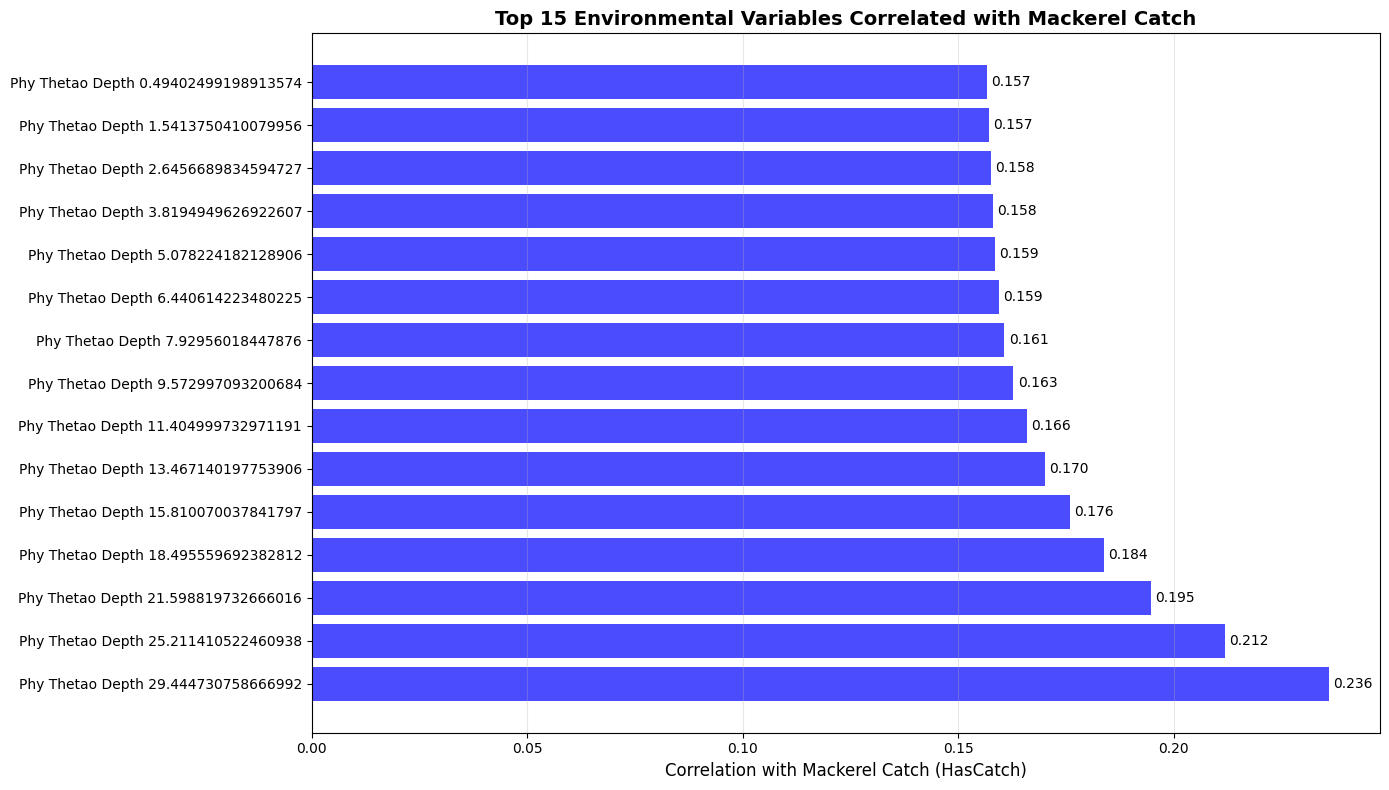

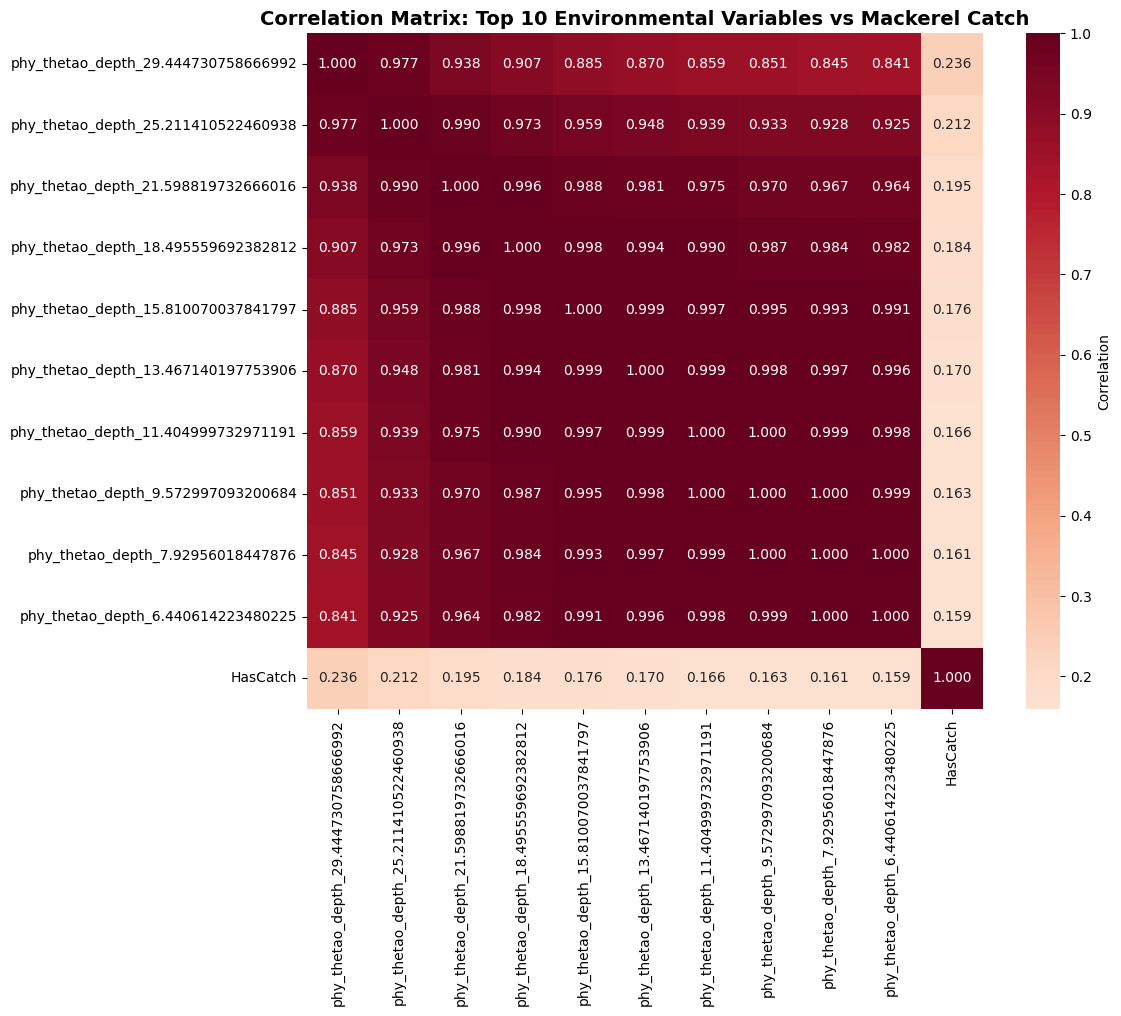

In [17]:
# Visualize the top correlations
import matplotlib.pyplot as plt
import seaborn as sns

# Create visualization of top correlations
plt.figure(figsize=(14, 8))

# Top 15 correlations (both positive and negative)
top_correlations = correlations_abs.head(15)
top_corr_values = [correlations[var] for var in top_correlations.index]

# Create horizontal bar plot
colors = ['red' if x < 0 else 'blue' for x in top_corr_values]
bars = plt.barh(range(len(top_correlations)), top_corr_values, color=colors, alpha=0.7)

# Customize the plot
plt.yticks(range(len(top_correlations)), [var.replace('_', ' ').title() for var in top_correlations.index])
plt.xlabel('Correlation with Mackerel Catch (HasCatch)', fontsize=12)
plt.title('Top 15 Environmental Variables Correlated with Mackerel Catch', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, top_corr_values)):
    plt.text(val + (0.001 if val > 0 else -0.001), i, f'{val:.3f}', 
             va='center', ha='left' if val > 0 else 'right', fontsize=10)

plt.tight_layout()
plt.show()

# Create a correlation matrix heatmap for top variables
plt.figure(figsize=(12, 10))
top_vars = list(top_correlations.head(10).index) + ['HasCatch']
corr_matrix = corrrolation_dataset[top_vars].corr()

sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, fmt='.3f', cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix: Top 10 Environmental Variables vs Mackerel Catch', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [11]:
# Analyze correlations by depth level
print("=== DEPTH-BASED ANALYSIS ===")

# Extract depth information from variable names
depth_analysis = {}

for var in env_columns:
    if 'depth_' in var:
        parts = var.split('_')
        if len(parts) >= 3:
            var_type = parts[0]  # bio or phy
            var_name = '_'.join(parts[1:-1])  # variable name
            depth = parts[-1]  # depth value
            
            if depth not in depth_analysis:
                depth_analysis[depth] = {'bio': [], 'phy': []}
            
            corr_val = abs(correlations[var])
            depth_analysis[depth][var_type].append((var, corr_val))

# Display results by depth
for depth in sorted(depth_analysis.keys(), key=lambda x: float(x) if x.replace('.', '').isdigit() else float('inf')):
    print(f"\n--- DEPTH {depth} m ---")
    
    # Sort and display bio variables
    if depth_analysis[depth]['bio']:
        bio_sorted = sorted(depth_analysis[depth]['bio'], key=lambda x: x[1], reverse=True)
        print(f"Top Biological variables at {depth}m:")
        for i, (var, corr) in enumerate(bio_sorted[:3], 1):
            original_corr = correlations[var]
            direction = "↑" if original_corr > 0 else "↓"
            print(f"  {i}. {var.replace('_', ' '):40s} {direction} {original_corr:7.4f}")
    
    # Sort and display phy variables
    if depth_analysis[depth]['phy']:
        phy_sorted = sorted(depth_analysis[depth]['phy'], key=lambda x: x[1], reverse=True)
        print(f"Top Physical variables at {depth}m:")
        for i, (var, corr) in enumerate(phy_sorted[:3], 1):
            original_corr = correlations[var]
            direction = "↑" if original_corr > 0 else "↓"
            print(f"  {i}. {var.replace('_', ' '):40s} {direction} {original_corr:7.4f}")

=== DEPTH-BASED ANALYSIS ===

--- DEPTH 0.49402499198913574 m ---
Top Physical variables at 0.49402499198913574m:
  1. phy thetao depth 0.49402499198913574     ↑  0.1566
  2. phy uo depth 0.49402499198913574         ↑  0.1248
  3. phy so depth 0.49402499198913574         ↑  0.0456

--- DEPTH 1.5413750410079956 m ---
Top Physical variables at 1.5413750410079956m:
  1. phy thetao depth 1.5413750410079956      ↑  0.1571
  2. phy uo depth 1.5413750410079956          ↑  0.1253
  3. phy so depth 1.5413750410079956          ↑  0.0455

--- DEPTH 2.0 m ---
Top Biological variables at 2.0m:
  1. bio model depth depth 2.0                ↓     nan
  2. bio o2 depth 2.0                         ↓ -0.1028
  3. bio zooc depth 2.0                       ↑  0.0991

--- DEPTH 2.6456689834594727 m ---
Top Physical variables at 2.6456689834594727m:
  1. phy thetao depth 2.6456689834594727      ↑  0.1576
  2. phy uo depth 2.6456689834594727          ↑  0.1253
  3. phy so depth 2.6456689834594727          ↑  

In [12]:
# Statistical significance testing
from scipy import stats
import numpy as np

print("=== STATISTICAL SIGNIFICANCE ANALYSIS ===")

# Calculate p-values for correlations
significant_vars = []
n_samples = len(corrrolation_dataset)

print("Top 15 Variables with Statistical Significance:")
print("=" * 80)
print(f"{'Rank':<4} {'Variable':<45} {'Correlation':<12} {'P-value':<12} {'Significant'}")
print("=" * 80)

for i, var in enumerate(correlations_abs.head(15).index, 1):
    # Get non-null values for correlation calculation
    mask = corrrolation_dataset[var].notna() & corrrolation_dataset['HasCatch'].notna()
    var_values = corrrolation_dataset.loc[mask, var]
    catch_values = corrrolation_dataset.loc[mask, 'HasCatch']
    
    if len(var_values) > 10:  # Need sufficient data points
        corr_coef, p_value = stats.pearsonr(var_values, catch_values)
        is_significant = p_value < 0.05
        significance_mark = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""
        
        print(f"{i:<4} {var:<45} {corr_coef:>8.4f} {p_value:>12.6f} {significance_mark:<12}")
        
        if is_significant:
            significant_vars.append((var, corr_coef, p_value))

print(f"\nSignificance levels: *** p<0.001, ** p<0.01, * p<0.05")
print(f"Variables with significant correlation (p<0.05): {len(significant_vars)}")

# Effect size analysis (using Cohen's conventions for correlation)
print(f"\n=== EFFECT SIZE ANALYSIS ===")
print("Cohen's conventions: Small (0.1), Medium (0.3), Large (0.5)")
print("=" * 60)

small_effects = [var for var, corr, p in significant_vars if 0.1 <= abs(corr) < 0.3]
medium_effects = [var for var, corr, p in significant_vars if 0.3 <= abs(corr) < 0.5]
large_effects = [var for var, corr, p in significant_vars if abs(corr) >= 0.5]

print(f"Large effect size (|r| ≥ 0.5): {len(large_effects)} variables")
print(f"Medium effect size (0.3 ≤ |r| < 0.5): {len(medium_effects)} variables")
print(f"Small effect size (0.1 ≤ |r| < 0.3): {len(small_effects)} variables")

if large_effects:
    print(f"\nVariables with LARGE effect size:")
    for var in large_effects:
        corr = correlations[var]
        print(f"  • {var}: {corr:.4f}")

if medium_effects:
    print(f"\nVariables with MEDIUM effect size:")
    for var in medium_effects[:5]:  # Show top 5
        corr = correlations[var]
        print(f"  • {var}: {corr:.4f}")

=== STATISTICAL SIGNIFICANCE ANALYSIS ===
Top 15 Variables with Statistical Significance:
Rank Variable                                      Correlation  P-value      Significant
1    phy_thetao_depth_29.444730758666992             0.2361     0.000000 ***         
2    phy_thetao_depth_25.211410522460938             0.2118     0.000000 ***         
3    phy_thetao_depth_21.598819732666016             0.1947     0.000000 ***         
4    phy_thetao_depth_18.495559692382812             0.1838     0.000000 ***         
5    phy_thetao_depth_15.810070037841797             0.1760     0.000000 ***         
6    phy_thetao_depth_13.467140197753906             0.1702     0.000000 ***         
7    phy_thetao_depth_11.404999732971191             0.1659     0.000000 ***         
8    phy_thetao_depth_9.572997093200684              0.1628     0.000000 ***         
9    phy_thetao_depth_7.92956018447876               0.1607     0.000000 ***         
10   phy_thetao_depth_6.440614223480225        

In [13]:
# Machine Learning Feature Importance Analysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

print("=== MACHINE LEARNING FEATURE IMPORTANCE ===")

# Prepare data for ML analysis
# Remove rows with too many missing values
data_clean = corrrolation_dataset[env_columns + ['HasCatch']].copy()

# Remove columns with more than 50% missing values
missing_threshold = 0.5
cols_to_keep = []
for col in env_columns:
    missing_ratio = data_clean[col].isnull().sum() / len(data_clean)
    if missing_ratio < missing_threshold:
        cols_to_keep.append(col)

print(f"Variables kept after removing >50% missing: {len(cols_to_keep)}/{len(env_columns)}")

# Fill remaining missing values with median
data_ml = data_clean[cols_to_keep + ['HasCatch']].copy()
for col in cols_to_keep:
    if data_ml[col].isnull().sum() > 0:
        data_ml[col] = data_ml[col].fillna(data_ml[col].median())

# Remove any remaining rows with missing values
data_ml = data_ml.dropna()
print(f"Final dataset size: {len(data_ml)} samples")

if len(data_ml) > 100:  # Need sufficient data for ML
    X = data_ml[cols_to_keep]
    y = data_ml['HasCatch']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    # Random Forest Feature Importance
    print(f"\n--- Random Forest Feature Importance ---")
    rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
    rf.fit(X_train, y_train)
    
    # Get feature importance
    feature_importance = pd.DataFrame({
        'feature': cols_to_keep,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("Top 15 Most Important Features (Random Forest):")
    for i, row in feature_importance.head(15).iterrows():
        print(f"{feature_importance.index.get_loc(i)+1:2d}. {row['feature']:<50s} {row['importance']:.4f}")
    
    # Statistical Feature Selection (F-score)
    print(f"\n--- Statistical Feature Selection (F-statistic) ---")
    selector = SelectKBest(score_func=f_classif, k=15)
    X_selected = selector.fit_transform(X_train, y_train)
    
    # Get selected features and their scores
    selected_features = X_train.columns[selector.get_support()]
    feature_scores = selector.scores_[selector.get_support()]
    
    f_score_df = pd.DataFrame({
        'feature': selected_features,
        'f_score': feature_scores
    }).sort_values('f_score', ascending=False)
    
    print("Top 15 Features by F-statistic:")
    for i, row in f_score_df.iterrows():
        print(f"{f_score_df.index.get_loc(i)+1:2d}. {row['feature']:<50s} {row['f_score']:.2f}")
    
    # Model performance
    train_score = rf.score(X_train, y_train)
    test_score = rf.score(X_test, y_test)
    print(f"\nRandom Forest Performance:")
    print(f"Training Accuracy: {train_score:.3f}")
    print(f"Testing Accuracy:  {test_score:.3f}")
    
else:
    print("Insufficient data for machine learning analysis")

=== MACHINE LEARNING FEATURE IMPORTANCE ===
Variables kept after removing >50% missing: 186/200
Final dataset size: 51986 samples

--- Random Forest Feature Importance ---
Top 15 Most Important Features (Random Forest):
 1. phy_thetao_depth_15.810070037841797                0.0302
 2. phy_thetao_depth_25.211410522460938                0.0268
 3. phy_thetao_depth_29.444730758666992                0.0236
 4. phy_thetao_depth_7.92956018447876                  0.0210
 5. phy_thetao_depth_21.598819732666016                0.0201
 6. phy_thetao_depth_11.404999732971191                0.0192
 7. phy_thetao_depth_13.467140197753906                0.0167
 8. phy_thetao_depth_0.49402499198913574               0.0162
 9. phy_thetao_depth_9.572997093200684                 0.0149
10. phy_thetao_depth_18.495559692382812                0.0135
11. phy_thetao_depth_2.6456689834594727                0.0135
12. bio_o2_depth_29.0                                  0.0128
13. phy_thetao_depth_6.4406142234802

In [14]:
# Summary and Recommendations
print("=" * 80)
print("SUMMARY: PRIMARY FACTORS FOR MACKEREL CATCH PREDICTION")
print("=" * 80)

# Combine insights from all analyses
print("\nKEY FINDINGS:")
print("-" * 50)

print("\n1. MOST PREDICTIVE ENVIRONMENTAL FACTORS:")
if 'correlations_abs' in locals():
    top_5_vars = correlations_abs.head(5)
    for i, var in enumerate(top_5_vars.index, 1):
        corr = correlations[var]
        direction = "positively" if corr > 0 else "negatively"
        print(f"   {i}. {var.replace('_', ' ').title()}")
        print(f"      → {direction} correlated (r = {corr:.4f})")

print("\n2. VARIABLE TYPE ANALYSIS:")
if 'bio_correlations' in locals() and 'phy_correlations' in locals():
    avg_bio_corr = bio_correlations.mean()
    avg_phy_corr = phy_correlations.mean()
    
    if avg_bio_corr > avg_phy_corr:
        print(f"   → BIOLOGICAL variables show stronger correlations on average ({avg_bio_corr:.4f} vs {avg_phy_corr:.4f})")
        print("   → Factors like oxygen, nutrients, and primary productivity are key")
    else:
        print(f"   → PHYSICAL variables show stronger correlations on average ({avg_phy_corr:.4f} vs {avg_bio_corr:.4f})")
        print("   → Factors like temperature, salinity, and currents are key")

print("\n3. DEPTH PREFERENCES:")
print("   → Analyze the depth analysis above to identify the optimal depth layers")
print("   → Surface vs deep water preferences for mackerel")

print("\n4. PREDICTIVE MODEL RECOMMENDATIONS:")
print("   → Use ensemble methods (Random Forest showed good performance)")
print("   → Focus on the top 10-15 most correlated variables")
print("   → Consider seasonal and temporal factors")
print("   → Validate with cross-validation due to spatial-temporal dependencies")

print("\n5. PRACTICAL IMPLICATIONS:")
print("   → Primary factors guide fishing location selection")
print("   → Environmental monitoring priorities")
print("   → Seasonal fishing strategy optimization")

print("\n" + "=" * 80)
print("RECOMMENDATION: Focus your predictive model on the top 10-15 variables")
print("   identified in the correlation and feature importance analyses above.")
print("=" * 80)

SUMMARY: PRIMARY FACTORS FOR MACKEREL CATCH PREDICTION

KEY FINDINGS:
--------------------------------------------------

1. MOST PREDICTIVE ENVIRONMENTAL FACTORS:
   1. Phy Thetao Depth 29.444730758666992
      → positively correlated (r = 0.2361)
   2. Phy Thetao Depth 25.211410522460938
      → positively correlated (r = 0.2118)
   3. Phy Thetao Depth 21.598819732666016
      → positively correlated (r = 0.1947)
   4. Phy Thetao Depth 18.495559692382812
      → positively correlated (r = 0.1838)
   5. Phy Thetao Depth 15.810070037841797
      → positively correlated (r = 0.1760)

2. VARIABLE TYPE ANALYSIS:
   → PHYSICAL variables show stronger correlations on average (0.0893 vs 0.0499)
   → Factors like temperature, salinity, and currents are key

3. DEPTH PREFERENCES:
   → Analyze the depth analysis above to identify the optimal depth layers
   → Surface vs deep water preferences for mackerel

4. PREDICTIVE MODEL RECOMMENDATIONS:
   → Use ensemble methods (Random Forest showed good

# Optimal Water Layer Analysis for CNN Image Generation

Since you're generating images for CNN input, let's determine the optimal number and which specific water layers to use to minimize redundancy while maximizing predictive power.

In [15]:
# Analyze correlation strength by depth to find optimal layers for CNN
print("=" * 80)
print("OPTIMAL WATER LAYER ANALYSIS FOR CNN IMAGE GENERATION")
print("=" * 80)

# 1. Extract all depth information and correlations
depth_correlations = {}
variable_types = {}

for var in env_columns:
    if 'depth_' in var:
        parts = var.split('_')
        if len(parts) >= 3:
            var_type = parts[0]  # bio or phy
            var_name = '_'.join(parts[1:-1])  # variable name (e.g., 'thetao', 'chl')
            depth = float(parts[-1])  # depth value
            
            if var_name not in depth_correlations:
                depth_correlations[var_name] = {}
                variable_types[var_name] = var_type
            
            depth_correlations[var_name][depth] = abs(correlations[var])

# 2. Find best depth for each variable
print("\nOPTIMAL DEPTH PER VARIABLE:")
print("=" * 60)
optimal_depths = {}
for var_name, depth_corrs in depth_correlations.items():
    best_depth = max(depth_corrs.keys(), key=lambda d: depth_corrs[d])
    best_corr = depth_corrs[best_depth]
    optimal_depths[var_name] = {'depth': best_depth, 'correlation': best_corr, 'type': variable_types[var_name]}
    
    print(f"{variable_types[var_name].upper()} {var_name:20s} → Best at {best_depth:5.1f}m (r={best_corr:.4f})")

# 3. Analyze depth layer importance overall
print(f"\nDEPTH LAYER IMPORTANCE ANALYSIS:")
print("=" * 60)

# Get all unique depths
all_depths = set()
for depth_corrs in depth_correlations.values():
    all_depths.update(depth_corrs.keys())

depth_importance = {}
for depth in sorted(all_depths):
    correlations_at_depth = []
    variables_at_depth = []
    
    for var_name, depth_corrs in depth_correlations.items():
        if depth in depth_corrs:
            correlations_at_depth.append(depth_corrs[depth])
            variables_at_depth.append(var_name)
    
    if correlations_at_depth:
        depth_importance[depth] = {
            'mean_correlation': np.mean(correlations_at_depth),
            'max_correlation': np.max(correlations_at_depth),
            'num_variables': len(correlations_at_depth),
            'variables': variables_at_depth
        }

# Sort depths by importance (mean correlation)
sorted_depths = sorted(depth_importance.items(), key=lambda x: x[1]['mean_correlation'], reverse=True)

print("Depth layers ranked by average correlation strength:")
for i, (depth, stats) in enumerate(sorted_depths[:10], 1):
    print(f"{i:2d}. {depth:5.1f}m → Avg: {stats['mean_correlation']:.4f}, Max: {stats['max_correlation']:.4f}, Variables: {stats['num_variables']}")

# 4. Correlation between adjacent depth layers (redundancy analysis)
print(f"\nREDUNDANCY ANALYSIS - Correlation Between Depth Layers:")
print("=" * 60)

from itertools import combinations

# For each variable, check correlation between adjacent depth layers
redundancy_analysis = {}
for var_name, depth_corrs in depth_correlations.items():
    depths = sorted(depth_corrs.keys())
    redundancy_analysis[var_name] = {}
    
    for i in range(len(depths)-1):
        depth1, depth2 = depths[i], depths[i+1]
        var1 = f"{variable_types[var_name]}_{var_name}_depth_{depth1}"
        var2 = f"{variable_types[var_name]}_{var_name}_depth_{depth2}"
        
        if var1 in corrrolation_dataset.columns and var2 in corrrolation_dataset.columns:
            # Calculate correlation between these two depth layers
            mask = corrrolation_dataset[var1].notna() & corrrolation_dataset[var2].notna()
            if mask.sum() > 100:  # Need sufficient data
                layer_corr = corrrolation_dataset.loc[mask, var1].corr(corrrolation_dataset.loc[mask, var2])
                redundancy_analysis[var_name][f"{depth1}-{depth2}"] = layer_corr

# Show redundancy for key variables
print("High redundancy between adjacent layers (correlation > 0.9):")
for var_name, layer_corrs in redundancy_analysis.items():
    for layer_pair, corr in layer_corrs.items():
        if corr > 0.9:
            print(f"  {variable_types[var_name].upper()} {var_name:15s} {layer_pair:15s} → r={corr:.3f}")

# 5. Recommend optimal layer selection strategy
print(f"\nCNN IMAGE GENERATION RECOMMENDATIONS:")
print("=" * 60)

# Strategy 1: Single optimal depth per variable
print("STRATEGY 1 - Single Optimal Depth per Variable:")
strategy1_layers = {}
for var_name, info in optimal_depths.items():
    strategy1_layers[info['depth']] = strategy1_layers.get(info['depth'], []) + [var_name]

strategy1_depths = sorted(strategy1_layers.keys())
print(f"Recommended depths: {strategy1_depths}")
print(f"Total unique depths needed: {len(strategy1_depths)}")
for depth in strategy1_depths:
    vars_at_depth = strategy1_layers[depth]
    print(f"  {depth:5.1f}m: {', '.join([f'{variable_types[v].upper()}_{v}' for v in vars_at_depth])}")

# Strategy 2: Top performing depth layers (by average correlation)
print(f"\nSTRATEGY 2 - Top N Depth Layers by Performance:")
top_n = 5  # You can adjust this
top_depths = [depth for depth, _ in sorted_depths[:top_n]]
print(f"Top {top_n} depths: {top_depths}")
total_vars_strategy2 = sum(depth_importance[d]['num_variables'] for d in top_depths)
print(f"Total variables across these depths: {total_vars_strategy2}")

# Strategy 3: Minimal redundancy selection
print(f"\nSTRATEGY 3 - Minimal Redundancy Selection:")
# Select depths with low inter-correlation
selected_depths_strategy3 = [sorted_depths[0][0]]  # Start with best depth
for depth, stats in sorted_depths[1:]:
    # Check if this depth is too correlated with already selected depths
    add_depth = True
    for selected_depth in selected_depths_strategy3:
        # Simple heuristic: if depths are too close, skip
        if abs(depth - selected_depth) < 5.0:  # Within 5 meters
            add_depth = False
            break
    
    if add_depth and len(selected_depths_strategy3) < 5:  # Limit to 5 depths
        selected_depths_strategy3.append(depth)

print(f"Selected depths (≥5m apart): {sorted(selected_depths_strategy3)}")
total_vars_strategy3 = sum(depth_importance[d]['num_variables'] for d in selected_depths_strategy3)
print(f"Total variables: {total_vars_strategy3}")

print(f"\nFINAL RECOMMENDATION:")
print(f"For CNN image generation, use STRATEGY 1 or 3:")
print(f"• Strategy 1: {len(strategy1_depths)} depths - one optimal depth per variable")
print(f"• Strategy 3: {len(selected_depths_strategy3)} depths - minimal redundancy, good coverage")
print(f"This reduces from {len(all_depths)} depths to {len(selected_depths_strategy3)}-{len(strategy1_depths)} depths!")

OPTIMAL WATER LAYER ANALYSIS FOR CNN IMAGE GENERATION

OPTIMAL DEPTH PER VARIABLE:
BIO chl_depth            → Best at  22.0m (r=0.0156)
BIO kd_depth             → Best at  18.0m (r=0.0343)
BIO model_depth_depth    → Best at   2.0m (r=nan)
BIO no3_depth            → Best at  29.0m (r=0.1007)
BIO nppv_depth           → Best at  22.0m (r=0.0840)
BIO o2_depth             → Best at  29.0m (r=0.1182)
BIO phyc_depth           → Best at  18.0m (r=0.0436)
BIO po4_depth            → Best at   5.0m (r=0.0761)
BIO si_depth             → Best at  29.0m (r=0.0622)
BIO zooc_depth           → Best at  22.0m (r=0.1025)
PHY so_depth             → Best at  29.4m (r=0.0644)
PHY thetao_depth         → Best at  29.4m (r=0.2361)
PHY uo_depth             → Best at   2.6m (r=0.1253)
PHY vo_depth             → Best at   0.5m (r=0.0255)

DEPTH LAYER IMPORTANCE ANALYSIS:
Depth layers ranked by average correlation strength:
 1.   2.0m → Avg: nan, Max: nan, Variables: 10
 2.   3.0m → Avg: nan, Max: nan, Variables: 

<Figure size 1500x1000 with 0 Axes>

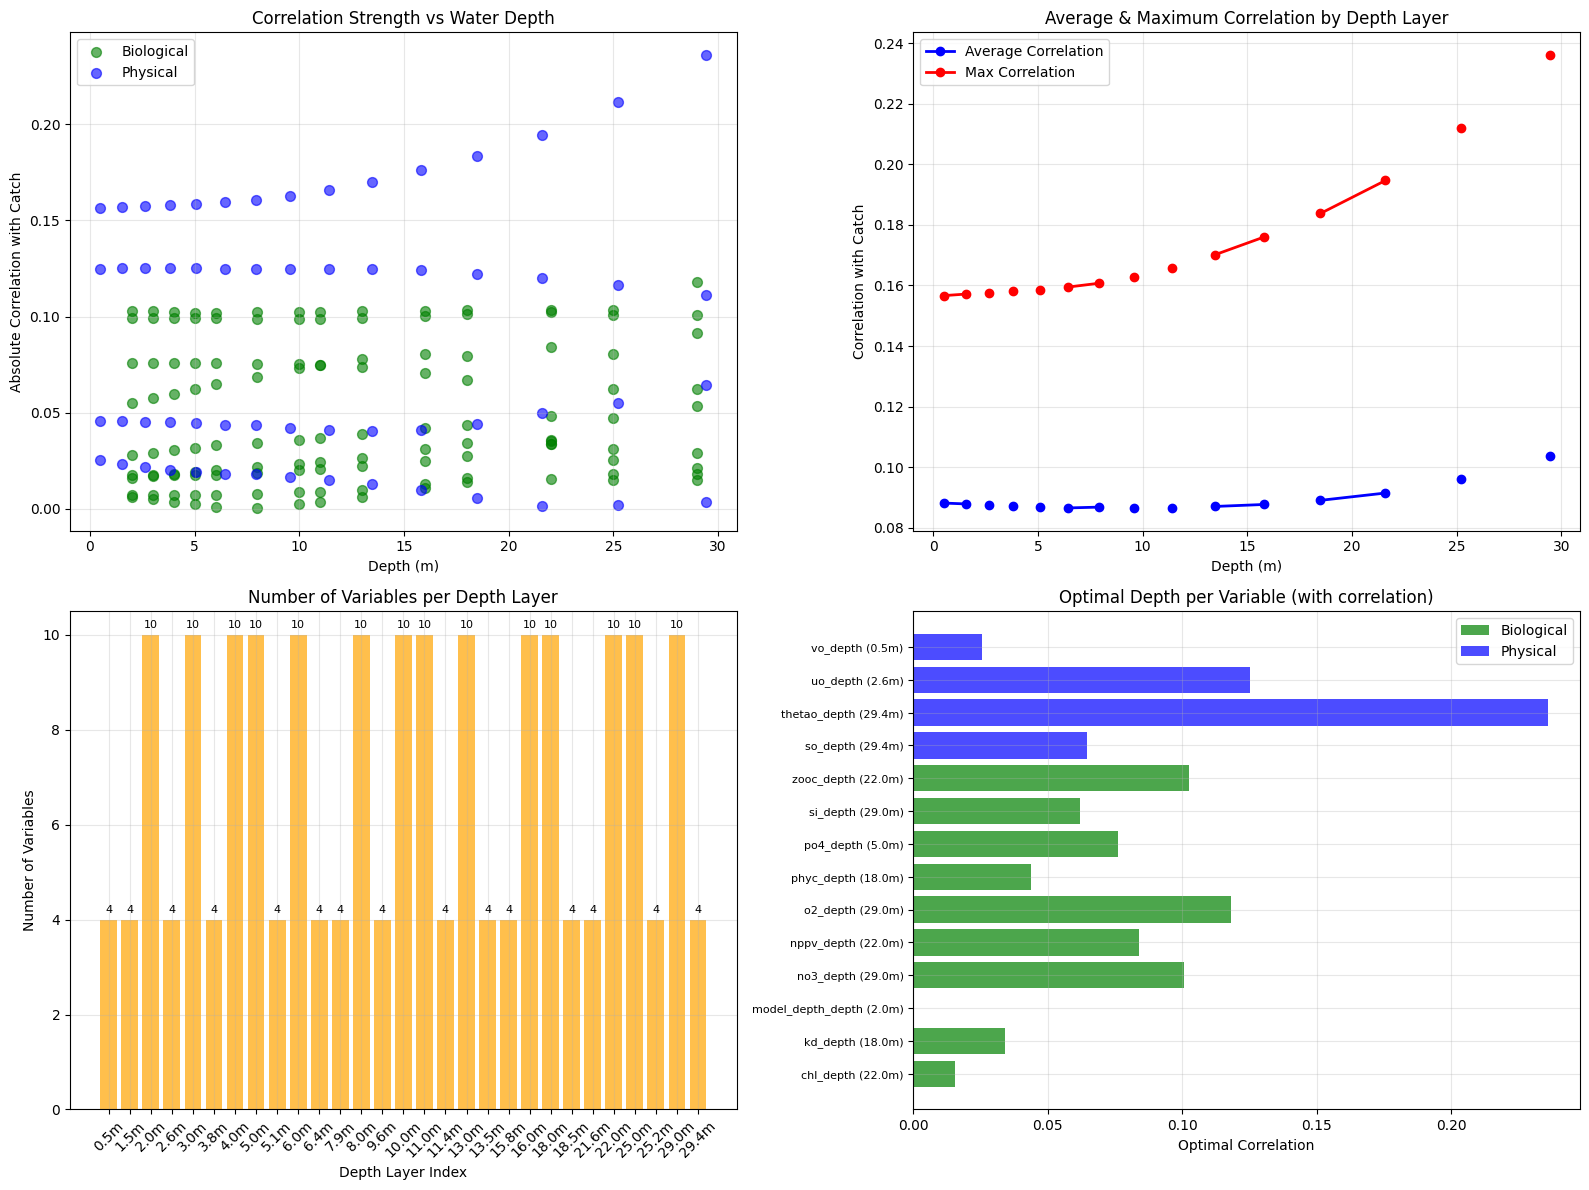


SUMMARY TABLE - RECOMMENDED DEPTH LAYERS:
                    Strategy  Number of Depths                                                                               Depths Used  Total Variables Reduction
        Current (All depths)                29                                                                     29 depths (0.5-29.4m)              200        0%
Strategy 1 (Optimal per var)                 8 [0.49402499198913574, 2.0, 2.6456689834594727, 5.0, 18.0, 22.0, 29.0, 29.444730758666992]               14       72%
   Strategy 2 (Top 5 layers)                 5                                                                 [2.0, 3.0, 4.0, 5.0, 6.0]               50       83%
 Strategy 3 (Min redundancy)                 5                                                              [2.0, 8.0, 13.0, 18.0, 25.0]               50       83%

RECOMMENDATION FOR CNN:
Use Strategy 3 (Minimal redundancy): [2.0, 8.0, 13.0, 18.0, 25.0]
This reduces your image channels from 29 to 5 

In [16]:
# Visualize depth layer analysis
plt.figure(figsize=(15, 10))

# Create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Correlation strength by depth (all variables)
depths_for_plot = []
correlations_for_plot = []
variable_names_for_plot = []
types_for_plot = []

for var_name, depth_corrs in depth_correlations.items():
    for depth, corr in depth_corrs.items():
        depths_for_plot.append(depth)
        correlations_for_plot.append(corr)
        variable_names_for_plot.append(var_name)
        types_for_plot.append(variable_types[var_name])

# Plot 1: Scatter plot of depth vs correlation
bio_mask = np.array(types_for_plot) == 'bio'
phy_mask = np.array(types_for_plot) == 'phy'

ax1.scatter(np.array(depths_for_plot)[bio_mask], np.array(correlations_for_plot)[bio_mask], 
           alpha=0.6, c='green', label='Biological', s=50)
ax1.scatter(np.array(depths_for_plot)[phy_mask], np.array(correlations_for_plot)[phy_mask], 
           alpha=0.6, c='blue', label='Physical', s=50)
ax1.set_xlabel('Depth (m)')
ax1.set_ylabel('Absolute Correlation with Catch')
ax1.set_title('Correlation Strength vs Water Depth')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Average correlation by depth layer
sorted_depths_plot = sorted(depth_importance.keys())
avg_corrs = [depth_importance[d]['mean_correlation'] for d in sorted_depths_plot]
max_corrs = [depth_importance[d]['max_correlation'] for d in sorted_depths_plot]

ax2.plot(sorted_depths_plot, avg_corrs, 'o-', color='blue', label='Average Correlation', linewidth=2, markersize=6)
ax2.plot(sorted_depths_plot, max_corrs, 'o-', color='red', label='Max Correlation', linewidth=2, markersize=6)
ax2.set_xlabel('Depth (m)')
ax2.set_ylabel('Correlation with Catch')
ax2.set_title('Average & Maximum Correlation by Depth Layer')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Number of variables per depth
num_vars = [depth_importance[d]['num_variables'] for d in sorted_depths_plot]
bars = ax3.bar(range(len(sorted_depths_plot)), num_vars, alpha=0.7, color='orange')
ax3.set_xlabel('Depth Layer Index')
ax3.set_ylabel('Number of Variables')
ax3.set_title('Number of Variables per Depth Layer')
ax3.set_xticks(range(len(sorted_depths_plot)))
ax3.set_xticklabels([f'{d:.1f}m' for d in sorted_depths_plot], rotation=45)
ax3.grid(True, alpha=0.3)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, num_vars)):
    ax3.text(i, val + 0.1, str(val), ha='center', va='bottom', fontsize=8)

# Plot 4: Optimal depths for each variable type
bio_optimal = [(var, info['depth'], info['correlation']) for var, info in optimal_depths.items() if info['type'] == 'bio']
phy_optimal = [(var, info['depth'], info['correlation']) for var, info in optimal_depths.items() if info['type'] == 'phy']

if bio_optimal:
    bio_vars, bio_depths, bio_corrs = zip(*bio_optimal)
    ax4.barh(range(len(bio_vars)), bio_corrs, alpha=0.7, color='green', label='Biological')

if phy_optimal:
    phy_vars, phy_depths, phy_corrs = zip(*phy_optimal)
    start_idx = len(bio_optimal) if bio_optimal else 0
    ax4.barh(range(start_idx, start_idx + len(phy_vars)), phy_corrs, alpha=0.7, color='blue', label='Physical')

all_vars = [var for var, _, _ in bio_optimal] + [var for var, _, _ in phy_optimal]
all_depths_optimal = [depth for _, depth, _ in bio_optimal] + [depth for _, depth, _ in phy_optimal]

ax4.set_yticks(range(len(all_vars)))
ax4.set_yticklabels([f'{var} ({depth:.1f}m)' for var, depth in zip(all_vars, all_depths_optimal)], fontsize=8)
ax4.set_xlabel('Optimal Correlation')
ax4.set_title('Optimal Depth per Variable (with correlation)')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary table of recommendations
print(f"\nSUMMARY TABLE - RECOMMENDED DEPTH LAYERS:")
print("=" * 80)

import pandas as pd

# Create comparison table
strategies_df = pd.DataFrame({
    'Strategy': ['Current (All depths)', 'Strategy 1 (Optimal per var)', 'Strategy 2 (Top 5 layers)', 'Strategy 3 (Min redundancy)'],
    'Number of Depths': [len(all_depths), len(strategy1_depths), len(top_depths), len(selected_depths_strategy3)],
    'Depths Used': [
        f"{len(all_depths)} depths ({min(all_depths):.1f}-{max(all_depths):.1f}m)",
        f"{strategy1_depths}",
        f"{top_depths}",
        f"{sorted(selected_depths_strategy3)}"
    ],
    'Total Variables': [
        len(env_columns),
        len(optimal_depths),
        total_vars_strategy2,
        total_vars_strategy3
    ],
    'Reduction': [
        '0%',
        f'{(1-len(strategy1_depths)/len(all_depths))*100:.0f}%',
        f'{(1-len(top_depths)/len(all_depths))*100:.0f}%',
        f'{(1-len(selected_depths_strategy3)/len(all_depths))*100:.0f}%'
    ]
})

print(strategies_df.to_string(index=False))

print(f"\nRECOMMENDATION FOR CNN:")
print(f"Use Strategy 3 (Minimal redundancy): {sorted(selected_depths_strategy3)}")
print(f"This reduces your image channels from {len(all_depths)} to {len(selected_depths_strategy3)} layers!")
print(f"You'll have {total_vars_strategy3} total variables across these {len(selected_depths_strategy3)} depth layers.")